# Bilderklassifikation

In der letzten Einheit haben wir gelernt, wie wir in PyTorch neuronale Netze implementieren und trainieren können. Als Datengrundlage dienten dabei zweidimensionale Punkte, die Vogeleier repräsentiert haben. Jeder dieser Dimensionen stand für eine Eigenschaft des Eis. So beschrieb der Datenpunkt $(8, 0.1)$ ein $8$ cm hohes und relativ dunkles Ei. Diese Klassifizierung setzt voraus, dass wir 

<ul>
    <li>festlegen, welche Eigenschaften der zu klassifizierenden Objekte für eine Unterscheidungen zur anderen Art der Objekte relevant sind und</li>
    <li>die festgelegten Eigenschaften für jedes Obejekt ausmessen.</li>
</ul>

Die Umsetzung beider Aspekte ist sehr schwierig und kostspielig. Es wäre viel praktischer, wenn wir Bilder von den verschiedenen Vogeleiern der KI zur Verfügung stellen und die KI die relevanten Eigenschaften der Objekte selbst herausfindet und ausmisst.

Genau das möchten wir in dieser Einheit realisieren. Nach einem kurzen Theorieteil wirst du ein neuronales Netz implementieren, das Bilder klassifizieren kann.


## Codierung von Bildern

Farben werden im Computer als Zahlenwerte codiert. Die gebräuchlichste Codierungsmethode ist dabei die <b>RGB-Codierung</b>, bei der jede Farbe eine Mischung der drei Farbkanäle rot, grün und blau ist, deren Werte jeweils im Zahlenbereich 0 bis 255 liegen, also 8 Bit groß sind (bspw. kodiert das Tripel (255, 128, 0) die Farbe Orange). Für ein buntes Bild müssen pro Pixel folglich drei Zahlenwerte gespeichert werden. Um die Komplexität zu reduzieren, betrachten wir im Folgenden nur Graustufenbilder. 

&nbsp;


 <figure>
  <img src="resources/img/lincoln_pixels.png" alt="Abraham Lincoln Pixels" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Bei Graustufenbilder wird nur ein Zahlenwert pro Pixel gespeichert. Der Zahlenwert 0 entspricht einem komplett schwarzen Pixel und der Wert 255 einem weißen Pixel. Zahlenwerte zwischen 0 und 255 entsprechen unterschiedlichen Graustufen. 

&nbsp;


 <figure>
  <img src="resources/img/nn_img.png" alt="Bild in neuronales Netz" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Bilder sind nichts anderes als zusammgesetzte Pixel und für den Computer somit einfach nur Listen aus Zahlen, die sich als Eingaben für neuronale Netze sehr gut eignen. Die Anzahl der Pixel muss dabei der Anzahl der Neuronen der Eingabeschicht entsprechen. Ein Bild, das nur aus einem Pixel besteht, können wir als Punkt in einem eindimensionalen Koordinatensystem auffassen. Ein Bild aus zwei Pixeln ist ein Punkt im zweidimensionalen Koordinatensytem usw. Auch Bilder können demzufolge als $n$-dimensionale Punkte aufgefasst werden, die wir uns allerdings nicht mehr wirklich vorstellen können.

&nbsp;


 <figure>
  <img src="resources/img/nn_klassen.png" alt="Klassen" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Genauso wie das Perzeptron trennen neuronale Netze eigentlich nur Datenpunkte voneinander durch Grenzen, die sie selbst ziehen. Diese Grenzen sind keine Geraden oder Ebenen wie Perzeptron, sondern gekrümmte $n$-dimensionale Linien. Mit Hilfe der Trainingsdaten lernen neuronale Netze den (vermeintlichen) Verlauf dieser Grenzen, sodass sie anschließend ungesehene Daten den unterschiedlichen Klassen zuordnen. In der oberen Abbildung ist zu sehen wie das neuronale Netz nach dem Anpassen der Gewichte an die Trainingsdaten den roten, unbekannten Datenpunkt der Klasse 3 zuweist.

## Vogeleierklassifikation

In der letzten Einheit hast du (fast) alle notwendigen Funktionsaufrufe in Python kennen gelernt, um jetzt ein eigenes neuronales Netz zu konstruieren, das Bilder klassifizieren kann. Bei den Bildern handelt es sich um Vogeleier, die du und deine Mitschüler:innen gemalt haben. Dein neuronales Netz wird nach dem Training in der Lage sein, Blaumeisen-, Enten- und Greifvögeleier auseinanderhalten zu können. 

&nbsp;


 <figure>
  <img src="resources/img/vogeleier.jpg" alt="Vogeleier" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Ergänze die folgenden Codefeldern den Kommentaren entsprechend, um dein eigenes neuronales Netz zu konstruieren, das die Bilder der Vogeleier richtig klassifizieren kann.</i>

In [1]:
# Füge hier den Pfad zu deinen Trainings- und Testdaten ein.

TRAIN_DATA_PATH = 'DataSet/train'
TEST_DATA_PATH = 'DataSet/test'

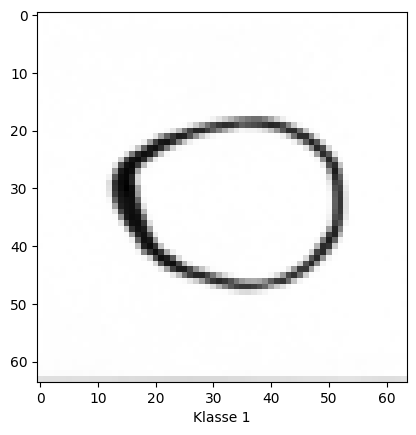

In [24]:
import warnings
warnings.filterwarnings('ignore')
from resources.code.help_functions import ei_zeichnen
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

train_transforms = transforms.Compose([
  transforms.Resize([64,64]),
  transforms.ToTensor(),
  transforms.Grayscale()
])

train_dataset = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

ei_zeichnen(train_dataset[105][0], f"Klasse {train_dataset[105][1]}")

In [108]:
# Implementiere in diesem Feld dein neuronales Netz.
# Wähle für die Bilder dabei eine passende Architektur.

import torch
import torch.nn as nn


class Net(nn.Module):
    

    def __init__(self, num_in, num_out):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4096, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 64)
        self.fc5 = nn.Linear(64, num_out)
        

        self.relu=torch.nn.ReLU()

        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        output = self.relu(self.fc1(x))
        output = self.relu(self.fc2(output))
        output = self.relu(self.fc3(output))
        output = self.relu(self.fc4(output))
        output = self.fc5(output)
        output = self.softmax(output)
        return output
    
net = Net(4096, 3)

In [109]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()

In [113]:
from tqdm import tqdm

count = 0
total = 0
for x,y in train_dataset:
    total += 1
    output = net(x.view(-1))
    output = torch.unsqueeze(output, 0)
    if torch.argmax(output).item() == y:
        count += 1

print(count, total)
for _ in tqdm(range(5)):
    for x,y in train_dataset:
        y = torch.tensor([y])
        output = net(x.view(-1))
        output = torch.unsqueeze(output, 0)
        loss = loss_func(output, y)
        # print(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

count = 0 
total = 0
for x,y in train_dataset:
    total += 1
    output = net(x.view(-1))
    output = torch.unsqueeze(output, 0)
    if torch.argmax(output).item() == y:
        count += 1
        
print(count, total)

88 233


100%|█████████████████████████████████████████████| 5/5 [03:11<00:00, 38.26s/it]


88 233


In [91]:
from torch.autograd import Variable

for _ in range(10):
    for x, y in train_loader:
        # x, y = x.long(), y.long()
        outputs = net(x.view(x.shape[0],1,-1))
       
        loss = loss_func(torch.argmax(outputs, dim=2), y)
        print(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


RuntimeError: "log_softmax_lastdim_kernel_impl" not implemented for 'Long'

&nbsp;


 <figure>
  <img src="resources/img/overfitting.png" alt="Overfitting" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

____

<i style="font-size:38px">?</i>

    
<i>Wir haben gelernt, wie wir das Perzeptron trainieren können Doch warum haben wir das eigentlich gemacht?</i>

&nbsp;

<details>
    
<summary>➤ Klicke hier, um deine Antwort zu prüfen.</summary>
   
Wir möchten das Perzeptron so trainieren, dass wir <b>unbekannte</b> Daten, auf denen wir unser Perzeptron <b>nicht</b> trainiert haben, richtig klassifizieren. Die Performance auf den <b>Trainingsdaten</b> dient zwar als Orientierung, ist aber nicht besonders wichtig.
   
</details>


<h3>Aktuelle Forschung</h3>

Die Forschung zu neuronalen Netzen ist noch lange nicht ausgeschöpft. Es gibt noch sehr vieles zu entdecken. So wissen wir z.B. immer noch nicht richtig, was genau neuronale Netze eigentlich lernen. 

Wenn du dich für die aktuelle Forschung zu neuronalen Netzen oder KI interessiert, ist folgender YouTube-Kanal empfehlenswert: 

https://www.youtube.com/c/K%C3%A1rolyZsolnai/videos?view=0&sort=p&shelf_id=0